In [1]:
import tensorflow as tf
import keras
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow.keras.optimizers import RMSprop


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


In [2]:
img_width = 300
img_height = 300

train_data_dir = 'horse-or-human/train'
validation_data_dir = 'horse-or-human/validation'
train_samples = 1027
validation_samples = 256
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))



import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1027 images belonging to 2 classes.


In [8]:
imgs, labels = next(train_generator)


20
1.0


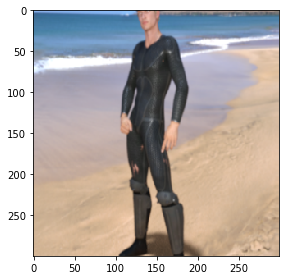

0.0


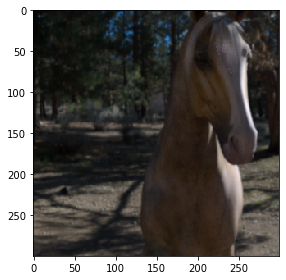

0.0


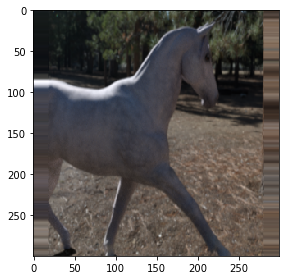

0.0


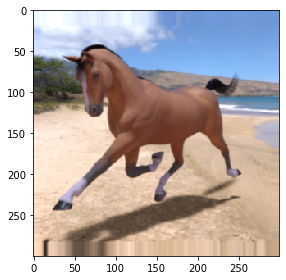

1.0


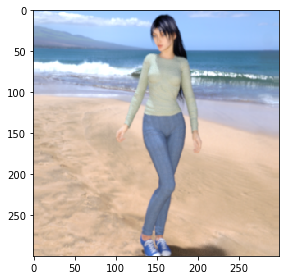

1.0


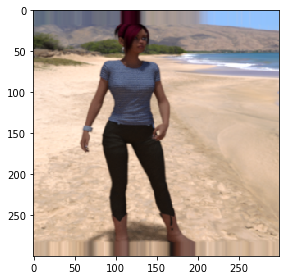

0.0


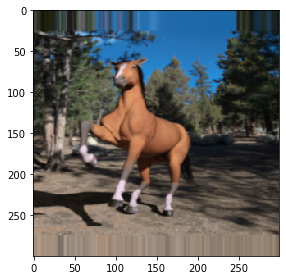

0.0


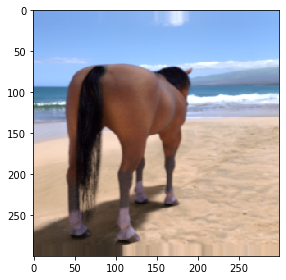

1.0


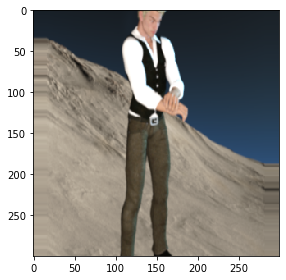

0.0


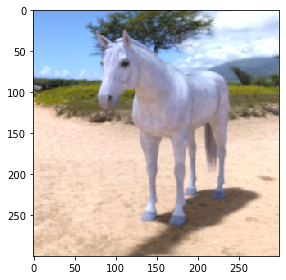

0.0


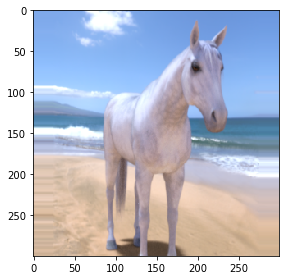

0.0


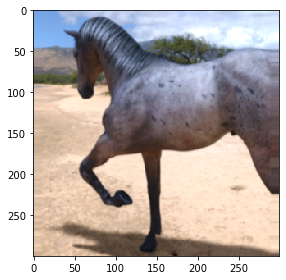

0.0


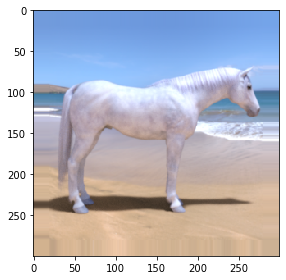

0.0


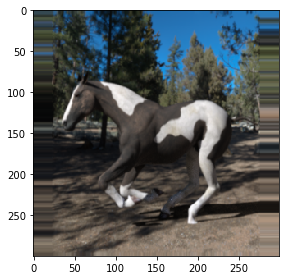

1.0


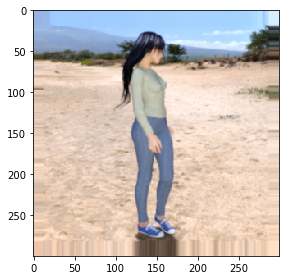

0.0


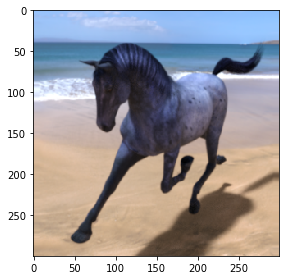

1.0


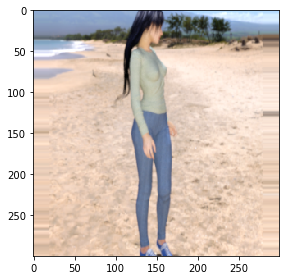

0.0


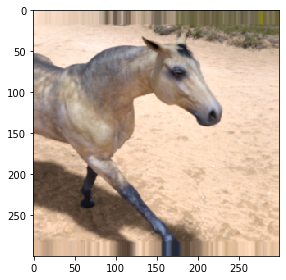

0.0


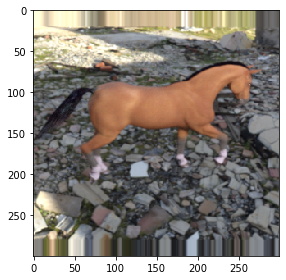

1.0


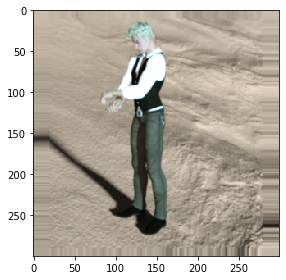

In [10]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

    
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [11]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 256 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
51/51 [==============================] - 60s 1s/step - loss: 0.5971 - accuracy: 0.6743 - val_loss: 0.8246 - val_accuracy: 0.5208
Epoch 2/5
51/51 [==============================] - 58s 1s/step - loss: 0.3035 - accuracy: 0.8937 - val_loss: 1.1237 - val_accuracy: 0.6750
Epoch 3/5
51/51 [==============================] - 59s 1s/step - loss: 0.1775 - accuracy: 0.9441 - val_loss: 1.3295 - val_accuracy: 0.6875
Epoch 4/5
51/51 [==============================] - 72s 1s/step - loss: 0.1117 - accuracy: 0.9613 - val_loss: 1.4422 - val_accuracy: 0.7042
Epoch 5/5
51/51 [==============================] - 76s 1s/step - loss: 0.0965 - accuracy: 0.9712 - val_loss: 2.1378 - val_accuracy: 0.6583


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


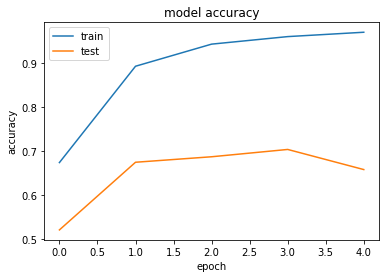

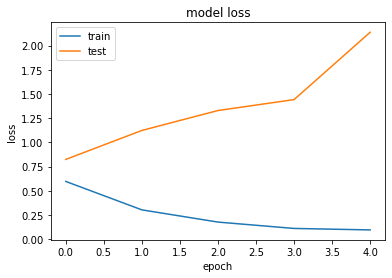

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
predict_dir_path='horse-or-human/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['5.jpg', '6.jpeg', '4.jpg', '1.jpg', '3.jpg', '2.jpg', '7.jpg']


In [19]:
# predicting images
from keras.preprocessing import image
human_counter = 0 
horse_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'horse')
        horse_counter += 1
    else:
        print(file + ": " + 'human')
        human_counter += 1
print("Total human :",human_counter)
print("Total horse :",horse_counter)

5.jpg: human
6.jpeg: human
4.jpg: horse
1.jpg: horse
3.jpg: human
2.jpg: horse
7.jpg: horse
Total human : 3
Total horse : 4
